In [87]:
import pandas as pd

In [88]:
final_df = pd.read_csv('../dataset/final_experiment_avg_df.csv')

In [89]:
final_df

,id,velocity,Period,Cycle_Number,experiment_number,position,displacement,smoothed_displacement
0,0,160.0,300.65650,1772.25,4.5,0.0,0.000203,0.000177
1,1,160.0,601.11325,3009.75,4.5,0.0,0.000196,0.000172
2,2,160.0,901.65225,4246.75,4.5,0.0,0.000193,0.000171
3,3,160.0,1202.14075,5483.50,4.5,0.0,0.000195,0.000173
4,4,160.0,1502.75775,6721.00,4.5,0.0,0.000193,0.000173
...,...,...,...,...,...,...,...,...
1191,1191,380.0,19230.41400,188809.50,6.5,1.0,0.000232,0.000205
1192,1192,380.0,19530.91400,191746.00,6.5,1.0,0.000242,0.000208
1193,1193,380.0,19831.52350,194684.50,6.5,1.0,0.000237,0.000207
1194,1194,380.0,20132.34350,197626.00,6.5,1.0,0.000238,0.000205


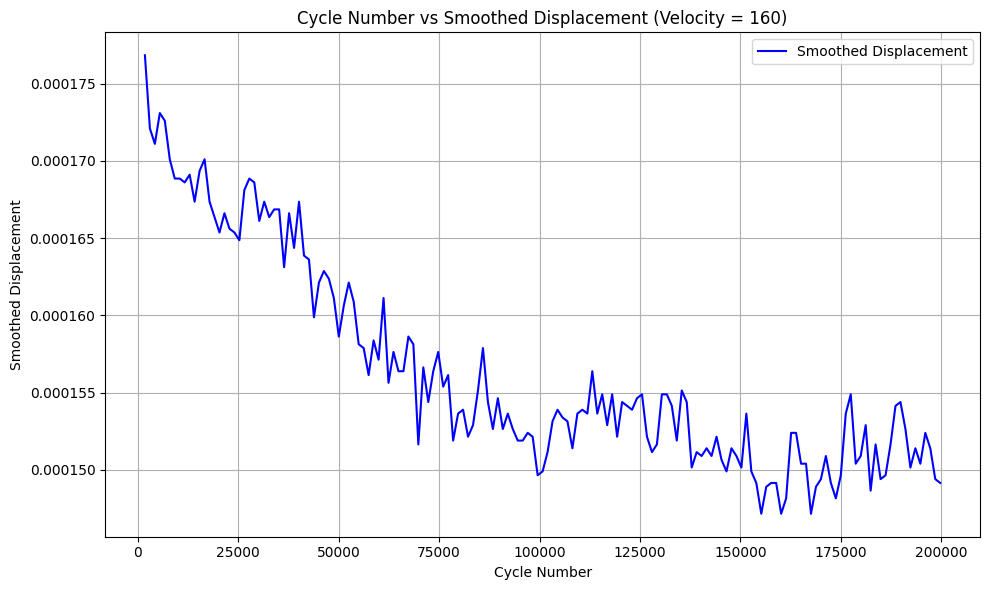

In [90]:
import matplotlib.pyplot as plt

# Filter the dataframe for velocity = 160
filtered_df = final_df[(final_df['velocity'] == 160) & (final_df['position'] == 0)]

# Plot Cycle_Number vs smoothed_displacement for filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Cycle_Number'], filtered_df['smoothed_displacement'], label='Smoothed Displacement', color='blue')

# Add labels and title
plt.xlabel('Cycle Number')
plt.ylabel('Smoothed Displacement')
plt.title('Cycle Number vs Smoothed Displacement (Velocity = 160)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [91]:
# Filtered DataFrames for each condition
filtered_df1 = final_df[(final_df['velocity'] == 160) & (final_df['position'] == 0)]
filtered_df2 = final_df[(final_df['velocity'] == 160) & (final_df['position'] == 1)]

# Convert each filtered DataFrame to a Series by stacking or using a specific column if needed
series1 = filtered_df1.stack()  # Stacks the entire DataFrame into a Series
series2 = filtered_df2.stack()  # Stacks the entire DataFrame into a Series

# Display the Series
print("Series 1:\n", series1)
print("\nSeries 2:\n", series2)


Series 1:
 0    id                            0.000000
     velocity                    160.000000
     Period                      300.656500
     Cycle_Number               1772.250000
     experiment_number             4.500000
                                  ...      
160  Cycle_Number             199717.250000
     experiment_number             4.500000
     position                      0.000000
     displacement                  0.000173
     smoothed_displacement         0.000149
Length: 1288, dtype: float64

Series 2:
 161  id                          161.000000
     velocity                    160.000000
     Period                      300.656500
     Cycle_Number               1772.250000
     experiment_number             4.500000
                                  ...      
321  Cycle_Number             199717.250000
     experiment_number             4.500000
     position                      1.000000
     displacement                  0.000188
     smoothed_displaceme

In [92]:
final_df_160_0 = final_df[(final_df['velocity'] == 160) & (final_df['position'] == 0)]

In [94]:
final_df_160_0.drop(['velocity', 'position', 'experiment_number', 'displacement', 'id'], axis=1, inplace=True)

C:\Users\alira\AppData\Local\Temp\ipykernel_21820\4028790132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_160_0.drop(['velocity', 'position', 'experiment_number', 'displacement', 'id'], axis=1, inplace=True)


In [95]:
final_df_160_0.drop(['Period'], axis=1, inplace=True)

C:\Users\alira\AppData\Local\Temp\ipykernel_21820\4229495633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_160_0.drop(['Period'], axis=1, inplace=True)


In [96]:
final_df_160_0

,Cycle_Number,smoothed_displacement
0,1772.25,0.000177
1,3009.75,0.000172
2,4246.75,0.000171
3,5483.50,0.000173
4,6721.00,0.000173
...,...,...
156,194768.75,0.000150
157,196004.00,0.000152
158,197242.75,0.000151
159,198479.50,0.000149


In [97]:
differences = final_df_160_0['Cycle_Number'].diff().dropna()


In [98]:
differences

1      1237.50
2      1237.00
3      1236.75
4      1237.50
5      1238.75
        ...   
156    1236.75
157    1235.25
158    1238.75
159    1236.75
160    1237.75
Name: Cycle_Number, Length: 160, dtype: float64

In [100]:
import numpy as np
average_difference = int(final_df_160_0['Cycle_Number'].diff().mean())

# Generate new Cycle_Number values with constant frequency
final_df_160_0['Cycle_Number'] = final_df_160_0['Cycle_Number'].iloc[0] + np.arange(len(final_df_160_0)) * average_difference


C:\Users\alira\AppData\Local\Temp\ipykernel_21820\3837155833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_160_0['Cycle_Number'] = final_df_160_0['Cycle_Number'].iloc[0] + np.arange(len(final_df_160_0)) * average_difference


In [101]:
differences = final_df_160_0['Cycle_Number'].diff().dropna()
differences

1      1237.0
2      1237.0
3      1237.0
4      1237.0
5      1237.0
        ...  
156    1237.0
157    1237.0
158    1237.0
159    1237.0
160    1237.0
Name: Cycle_Number, Length: 160, dtype: float64

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [121]:
final_df_160_0_original = final_df[(final_df['velocity'] == 160) & (final_df['position'] == 0)]

In [104]:
final_df_160_0.set_index('Cycle_Number', inplace=True)

In [105]:
scaler = MinMaxScaler()
final_df_160_0_scaled = scaler.fit_transform(final_df_160_0)

final_df_160_0_scaled

array([[1.00000000e+00],
       [8.40326792e-01],
       [8.06754822e-01],
       [8.73949297e-01],
       [8.57163312e-01],
       [7.73157584e-01],
       [7.31112608e-01],
       [7.31078919e-01],
       [7.22690137e-01],
       [7.39501390e-01],
       [6.80695696e-01],
       [7.47898593e-01],
       [7.73123895e-01],
       [6.80670429e-01],
       [6.47090036e-01],
       [6.13475954e-01],
       [6.55495662e-01],
       [6.21873158e-01],
       [6.13501221e-01],
       [5.96647856e-01],
       [7.05912575e-01],
       [7.31095763e-01],
       [7.22690137e-01],
       [6.38675988e-01],
       [6.80687274e-01],
       [6.47039501e-01],
       [6.63842331e-01],
       [6.63867599e-01],
       [5.37825318e-01],
       [6.55495662e-01],
       [5.79845027e-01],
       [6.80653584e-01],
       [5.63050619e-01],
       [5.54661838e-01],
       [4.28594290e-01],
       [5.04219658e-01],
       [5.29444959e-01],
       [5.12608439e-01],
       [4.70605576e-01],
       [3.86574581e-01],


In [106]:
# Create sequences and labels for training
seq_length = 24
X, y = [], []
for i in range(len(final_df_160_0_scaled) - seq_length):
    X.append(final_df_160_0_scaled[i:i + seq_length])
    y.append(final_df_160_0_scaled[i + seq_length])

X, y = np.array(X), np.array(y)
X, y

(array([[[1.        ],
         [0.84032679],
         [0.80675482],
         ...,
         [0.73109576],
         [0.72269014],
         [0.63867599]],
 
        [[0.84032679],
         [0.80675482],
         [0.8739493 ],
         ...,
         [0.72269014],
         [0.63867599],
         [0.68068727]],
 
        [[0.80675482],
         [0.8739493 ],
         [0.85716331],
         ...,
         [0.63867599],
         [0.68068727],
         [0.6470395 ]],
 
        ...,
 
        [[0.        ],
         [0.05887307],
         [0.07564221],
         ...,
         [0.14289565],
         [0.10924787],
         [0.17651815]],
 
        [[0.05887307],
         [0.07564221],
         [0.12610124],
         ...,
         [0.10924787],
         [0.17651815],
         [0.14285353]],
 
        [[0.07564221],
         [0.12610124],
         [0.06726185],
         ...,
         [0.17651815],
         [0.14285353],
         [0.07566748]]]),
 array([[6.80687274e-01],
        [6.47039501e-01],
   

In [107]:
# Split the data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [108]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def create_validation_sequence(start_cycle, end_cycle, seq_length, scaler):
    # Step 1: Calculate the number of points and the cycle difference based on training data
    num_points = (end_cycle - start_cycle) // average_difference
    validation_cycles = start_cycle + np.arange(num_points) * average_difference
    
    # Step 2: Generate synthetic `smoothed_displacement` values (or replace with actual values)
    # Here we use random values for demonstration; replace with actual logic if available
    smoothed_displacement_values = np.linspace(0.00015, 0.0002, len(validation_cycles))
    
    # Step 3: Scale the values using the provided scaler
    smoothed_displacement_values = smoothed_displacement_values.reshape(-1, 1)
    smoothed_displacement_scaled = scaler.transform(smoothed_displacement_values)
    
    # Step 4: Create sequences for X_validation
    X_validation = []
    for i in range(len(smoothed_displacement_scaled) - seq_length):
        X_validation.append(smoothed_displacement_scaled[i:i + seq_length].flatten())

    X_validation = np.array(X_validation)
    return X_validation

# Assuming average_difference is defined based on your training data
average_difference = 1235  # Replace with the actual average difference from your data

# Example scaler fit on your training data
scaler = MinMaxScaler()
scaler.fit(final_df_160_0[['smoothed_displacement']])  # Adjust to actual training data

# Generate X_validation for the range 200,000 to 240,000
X_validation = create_validation_sequence(start_cycle=200000, end_cycle=240000, seq_length=24, scaler=scaler)
X_validation


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.095654  , 0.14999253, 0.20433105, 0.25866958, 0.3130081 ,
        0.36734662, 0.42168515, 0.47602367, 0.53036219, 0.58470072,
        0.63903924, 0.69337776, 0.74771629, 0.80205481, 0.85639333,
        0.91073186, 0.96507038, 1.01940891, 1.07374743, 1.12808595,
        1.18242448, 1.236763  , 1.29110152, 1.34544005],
       [0.14999253, 0.20433105, 0.25866958, 0.3130081 , 0.36734662,
        0.42168515, 0.47602367, 0.53036219, 0.58470072, 0.63903924,
        0.69337776, 0.74771629, 0.80205481, 0.85639333, 0.91073186,
        0.96507038, 1.01940891, 1.07374743, 1.12808595, 1.18242448,
        1.236763  , 1.29110152, 1.34544005, 1.39977857],
       [0.20433105, 0.25866958, 0.3130081 , 0.36734662, 0.42168515,
        0.47602367, 0.53036219, 0.58470072, 0.63903924, 0.69337776,
        0.74771629, 0.80205481, 0.85639333, 0.91073186, 0.96507038,
        1.01940891, 1.07374743, 1.12808595, 1.18242448, 1.236763  ,
        1.29110152, 1.34544005, 1.39977857, 1.45411709],
       [0.258

In [109]:
final_df_160_0

,smoothed_displacement
Cycle_Number,
1772.25,0.000177
3009.25,0.000172
4246.25,0.000171
5483.25,0.000173
6720.25,0.000173
...,...
194744.25,0.000150
195981.25,0.000152
197218.25,0.000151


In [110]:
X_test

array([[[2.43712625e-01],
        [1.00875937e-01],
        [1.34490019e-01],
        [1.26084393e-01],
        [1.42904068e-01],
        [1.26075971e-01],
        [1.68120947e-01],
        [1.17670344e-01],
        [9.24534658e-02],
        [1.42878801e-01],
        [1.26075971e-01],
        [1.00867515e-01],
        [2.18512592e-01],
        [9.24281984e-02],
        [6.72786996e-02],
        [7.58022404e-05],
        [5.88814958e-02],
        [6.72702771e-02],
        [6.72871220e-02],
        [2.52674135e-05],
        [3.35719700e-02],
        [1.76501305e-01],
        [1.76518150e-01],
        [1.09289986e-01]],

       [[1.00875937e-01],
        [1.34490019e-01],
        [1.26084393e-01],
        [1.42904068e-01],
        [1.26075971e-01],
        [1.68120947e-01],
        [1.17670344e-01],
        [9.24534658e-02],
        [1.42878801e-01],
        [1.26075971e-01],
        [1.00867515e-01],
        [2.18512592e-01],
        [9.24281984e-02],
        [6.72786996e-02],
        [7

In [111]:

# Create a custom dataset class for PyTorch DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out


In [112]:
# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 500
batch_size = 64

# Create data loaders
train_dataset = TimeSeriesDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function, and optimizer
model = RNNModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [113]:
# Training the model
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/500], Loss: 0.0178
Epoch [20/500], Loss: 0.0182
Epoch [30/500], Loss: 0.0054
Epoch [40/500], Loss: 0.0037
Epoch [50/500], Loss: 0.0032
Epoch [60/500], Loss: 0.0036
Epoch [70/500], Loss: 0.0039
Epoch [80/500], Loss: 0.0038
Epoch [90/500], Loss: 0.0029
Epoch [100/500], Loss: 0.0035
Epoch [110/500], Loss: 0.0043
Epoch [120/500], Loss: 0.0039
Epoch [130/500], Loss: 0.0029
Epoch [140/500], Loss: 0.0033
Epoch [150/500], Loss: 0.0035
Epoch [160/500], Loss: 0.0042
Epoch [170/500], Loss: 0.0040
Epoch [180/500], Loss: 0.0038
Epoch [190/500], Loss: 0.0035
Epoch [200/500], Loss: 0.0033
Epoch [210/500], Loss: 0.0040
Epoch [220/500], Loss: 0.0026
Epoch [230/500], Loss: 0.0033
Epoch [240/500], Loss: 0.0024
Epoch [250/500], Loss: 0.0031
Epoch [260/500], Loss: 0.0041
Epoch [270/500], Loss: 0.0029
Epoch [280/500], Loss: 0.0043
Epoch [290/500], Loss: 0.0045
Epoch [300/500], Loss: 0.0039
Epoch [310/500], Loss: 0.0033
Epoch [320/500], Loss: 0.0033
Epoch [330/500], Loss: 0.0038
Epoch [340/500], Lo

In [115]:
X_test

array([[[2.43712625e-01],
        [1.00875937e-01],
        [1.34490019e-01],
        [1.26084393e-01],
        [1.42904068e-01],
        [1.26075971e-01],
        [1.68120947e-01],
        [1.17670344e-01],
        [9.24534658e-02],
        [1.42878801e-01],
        [1.26075971e-01],
        [1.00867515e-01],
        [2.18512592e-01],
        [9.24281984e-02],
        [6.72786996e-02],
        [7.58022404e-05],
        [5.88814958e-02],
        [6.72702771e-02],
        [6.72871220e-02],
        [2.52674135e-05],
        [3.35719700e-02],
        [1.76501305e-01],
        [1.76518150e-01],
        [1.09289986e-01]],

       [[1.00875937e-01],
        [1.34490019e-01],
        [1.26084393e-01],
        [1.42904068e-01],
        [1.26075971e-01],
        [1.68120947e-01],
        [1.17670344e-01],
        [9.24534658e-02],
        [1.42878801e-01],
        [1.26075971e-01],
        [1.00867515e-01],
        [2.18512592e-01],
        [9.24281984e-02],
        [6.72786996e-02],
        [7

In [116]:
# Evaluation on the test set
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_pred = model(X_test_tensor).numpy()
    y_pred = scaler.inverse_transform(y_pred)
    y_test = scaler.inverse_transform(y_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Root Mean Squared Error (RMSE): 1.952802800096988e-06
Mean Absolute Error (MAE): 0.00
Mean Absolute Percentage Error (MAPE): 1.06%


In [117]:
import torch

# Validation
model.eval()
with torch.no_grad():
    # Add the input_size dimension (1 feature in this case)
    X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32).unsqueeze(-1)
    
    # Make predictions
    y_pred_val = model(X_validation_tensor).numpy()
    y_pred_val = scaler.inverse_transform(y_pred_val)
    
    print("Validation Predictions:", y_pred_val)


Validation Predictions: [[0.0001837 ]
 [0.00018606]
 [0.0001885 ]
 [0.00019101]
 [0.00019358]
 [0.00019621]
 [0.00019889]
 [0.0002016 ]]


C:\Users\alira\AppData\Local\Temp\ipykernel_21820\514893805.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_160_0['smoothed_displacement_scaled'] = scaler.fit_transform(
c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


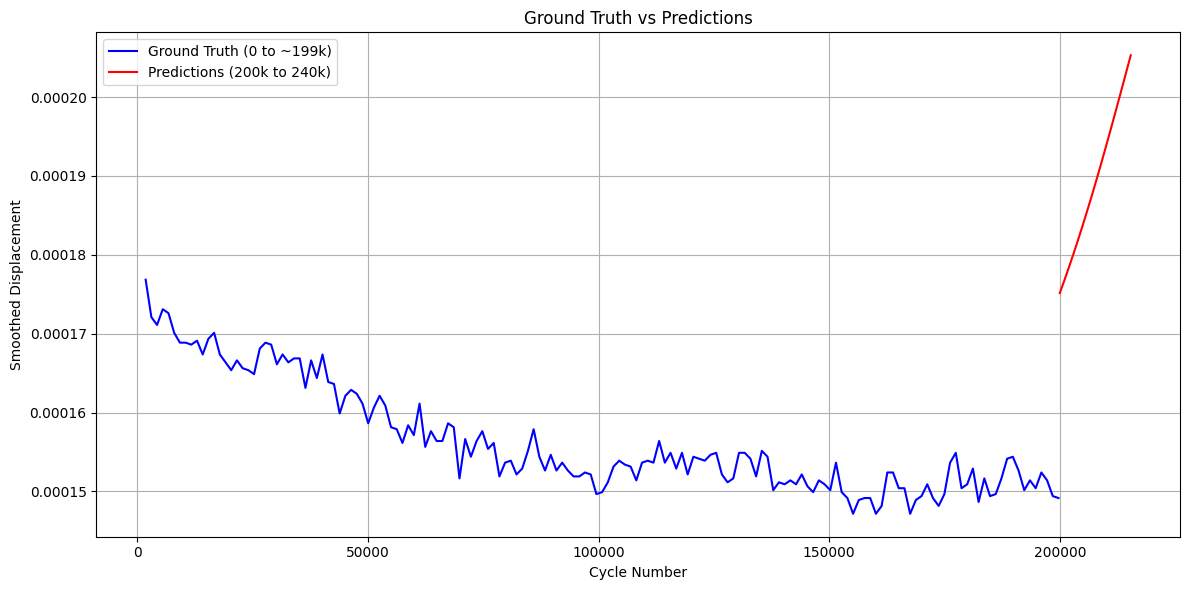

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch

# Assuming `model` is already defined and trained

def create_validation_sequence(start_cycle, end_cycle, seq_length, scaler, num_points):
    # Step 1: Calculate the frequency (interval) to generate exactly `num_points` in the range
    frequency = (end_cycle - start_cycle) / (num_points - 1)
    
    # Step 2: Generate `Cycle_Number` values with the calculated frequency
    validation_cycles = np.linspace(start_cycle, end_cycle, num_points)
    
    # Step 3: Generate synthetic `smoothed_displacement` values (or replace with actual values)
    # Here, using a linear increase from 0.00015 to 0.0002 for demonstration
    smoothed_displacement_values = np.linspace(0.00015, 0.0002, num_points)
    
    # Step 4: Scale the `smoothed_displacement` values
    smoothed_displacement_values = smoothed_displacement_values.reshape(-1, 1)
    smoothed_displacement_scaled = scaler.transform(smoothed_displacement_values)
    
    # Step 5: Create sequences for X_validation
    X_validation = []
    for i in range(len(smoothed_displacement_scaled) - seq_length):
        X_validation.append(smoothed_displacement_scaled[i:i + seq_length].flatten())
    
    X_validation = np.array(X_validation)
    return X_validation, validation_cycles

# Initialize and fit the scaler on the ground truth data
scaler = MinMaxScaler()
final_df_160_0['smoothed_displacement_scaled'] = scaler.fit_transform(
    final_df_160_0[['smoothed_displacement']]
)

# Generate X_validation for 40 points between 200k and 240k with sequence length of 24
X_validation, validation_cycles = create_validation_sequence(
    start_cycle=200000, 
    end_cycle=240000, 
    seq_length=24, 
    scaler=scaler, 
    num_points=40
)

# Convert X_validation to tensor for prediction
model.eval()
with torch.no_grad():
    X_validation_tensor = torch.tensor(X_validation, dtype=torch.float32).unsqueeze(-1)
    y_pred_val = model(X_validation_tensor).numpy()
    y_pred_val = scaler.inverse_transform(y_pred_val)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot ground truth from 0 to ~199k
plt.plot(final_df_160_0_original['Cycle_Number'], final_df_160_0_original['smoothed_displacement'], label="Ground Truth (0 to ~199k)", color="blue")

# Plot predictions for 200k to 240k
plt.plot(validation_cycles[:len(y_pred_val)], y_pred_val, label="Predictions (200k to 240k)", color="red")

# Labels and legend
plt.xlabel("Cycle Number")
plt.ylabel("Smoothed Displacement")
plt.title("Ground Truth vs Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [120]:
final_df_160_0_original

,smoothed_displacement,smoothed_displacement_scaled
Cycle_Number,,
1772.25,0.000177,1.000000
3009.25,0.000172,0.840327
4246.25,0.000171,0.806755
5483.25,0.000173,0.873949
6720.25,0.000173,0.857163
...,...,...
194744.25,0.000150,0.109248
195981.25,0.000152,0.176518
197218.25,0.000151,0.142854


In [77]:
final_df_160_0

,Cycle_Number,smoothed_displacement,smoothed_displacement_scaled
0,0.000000,0.000150,0.000000
1,1236.024845,0.000150,0.006211
2,2472.049689,0.000151,0.012422
3,3708.074534,0.000151,0.018634
4,4944.099379,0.000151,0.024845
...,...,...,...
157,194055.900621,0.000199,0.975155
158,195291.925466,0.000199,0.981366
159,196527.950311,0.000199,0.987578
160,197763.975155,0.000200,0.993789


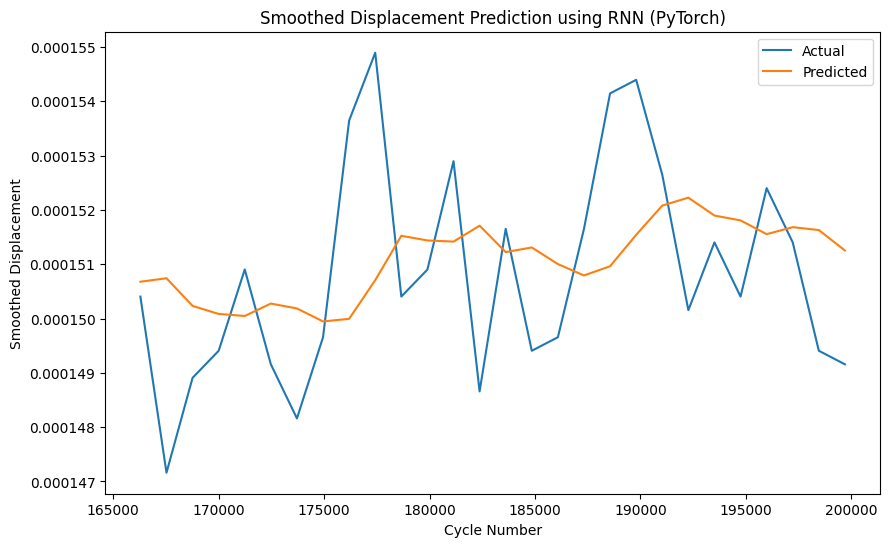

In [123]:

# Visualize predictions against actual data
plt.figure(figsize=(10, 6))
plt.plot(final_df_160_0.index[train_size+seq_length:], y_test, label='Actual')
plt.plot(final_df_160_0.index[train_size+seq_length:], y_pred, label='Predicted')
plt.xlabel('Cycle Number')
plt.ylabel('Smoothed Displacement')
plt.title('Smoothed Displacement Prediction using RNN (PyTorch)')
plt.legend()
plt.show()

Future Predictions: [0.00015129989, 0.00015133615, 0.00015137308, 0.00015141493, 0.00015145872, 0.00015150197, 0.00015154321, 0.000151582, 0.00015161847, 0.0001516524, 0.00015168388, 0.0001517134, 0.0001517407, 0.00015176629, 0.00015179014, 0.00015181226, 0.00015183279, 0.00015185196, 0.00015186994, 0.00015188687, 0.00015190261, 0.00015191735, 0.00015193103, 0.00015194385, 0.00015195594, 0.00015196714, 0.00015197758, 0.00015198735, 0.00015199647, 0.000152005, 0.00015201296, 0.00015202041, 0.00015202737, 0.00015203386, 0.00015203994, 0.00015204561, 0.00015205091, 0.00015205587, 0.00015206051, 0.00015206484, 0.00015206888, 0.00015207267, 0.0001520762, 0.00015207952, 0.0001520826, 0.0001520855, 0.00015208819, 0.00015209072, 0.0001520931, 0.0001520953, 0.00015209735, 0.0001520993, 0.00015210109, 0.00015210277, 0.00015210436, 0.00015210583, 0.0001521072, 0.00015210849, 0.00015210969, 0.00015211082, 0.00015211187, 0.00015211286, 0.00015211379, 0.00015211465, 0.00015211545, 0.0001521162, 0.00

TypeError: 'numpy.float64' object cannot be interpreted as an integer

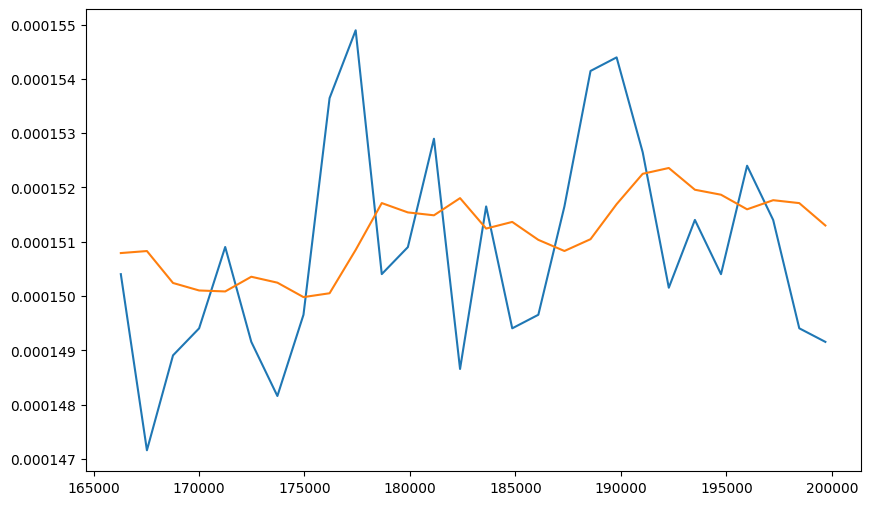

In [25]:
# Forecasting future cycles
forecast_horizon = 20000  # Number of future cycles you want to predict

# Start with the last known sequence from the test set
input_seq = X_test[-1]  # Use the last sequence in the test set as the starting point

future_predictions = []

model.eval()
with torch.no_grad():
    for _ in range(forecast_horizon):
        # Convert input sequence to tensor
        input_tensor = torch.tensor(input_seq, dtype=torch.float32).unsqueeze(0)
        
        # Predict the next value
        next_pred = model(input_tensor).numpy()
        
        # Inverse transform to get the prediction back to original scale
        next_pred_original = scaler.inverse_transform(next_pred)
        future_predictions.append(next_pred_original[0, 0])  # Append the predicted value
        
        # Update the input sequence by removing the first value and adding the new prediction
        next_input = np.append(input_seq[1:], next_pred, axis=0)
        input_seq = next_input

# Future predictions now contain forecasted smoothed displacement values for the next cycles
print("Future Predictions:", future_predictions)

# Visualize the future predictions alongside the original data
plt.figure(figsize=(10, 6))
plt.plot(final_df_160_0.index[train_size + seq_length:], y_test, label='Actual')
plt.plot(final_df_160_0.index[train_size + seq_length:], y_pred, label='Predicted')
plt.plot(range(final_df_160_0.index[-1] + 1, final_df_160_0.index[-1] + 1 + forecast_horizon), future_predictions, label='Forecast', linestyle='--')
plt.xlabel('Cycle Number')
plt.ylabel('Smoothed Displacement')
plt.title('Future Smoothed Displacement Forecast')
plt.legend()
plt.show()


# Transfomers

In [ ]:
final_df_160_0

,smoothed_displacement
Cycle_Number,
1772.25,0.000177
3009.25,0.000172
4246.25,0.000171
5483.25,0.000173
6720.25,0.000173


In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd

# Define the Transformer model with updated layer handling
class TransformerModel(tf.keras.Model):
    def __init__(self, embed_dim, num_heads, ff_dim, num_layers):
        super(TransformerModel, self).__init__()
        self.attention_layers = [MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim) for _ in range(num_layers)]
        self.norm_layers1 = [LayerNormalization(epsilon=1e-6) for _ in range(num_layers)]
        self.norm_layers2 = [LayerNormalization(epsilon=1e-6) for _ in range(num_layers)]
        self.ffn_layers = [Dense(ff_dim, activation='relu') for _ in range(num_layers)]
        self.dropout = Dropout(0.1)
        self.final_dense = Dense(1)  # Output layer for regression

    def call(self, x):
        for i in range(len(self.attention_layers)):
            # Multi-head attention
            attn_output = self.attention_layers[i](x, x)
            x = self.norm_layers1[i](x + attn_output)  # Apply residual connection and normalization

            # Feed-forward network
            ffn_output = self.ffn_layers[i](x)
            x = self.norm_layers2[i](x + ffn_output)  # Apply residual connection and normalization
            
        # Predict only the last step in the sequence
        x = self.final_dense(x[:, -1, :])  
        return x

# Model parameters
embed_dim = 64   # Embedding dimension
num_heads = 4    # Number of attention heads
ff_dim = 64      # Feed forward layer dimension
num_layers = 2   # Number of Transformer layers

# Instantiate and compile model
transformer_model = TransformerModel(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, num_layers=num_layers)
transformer_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [35]:
# Step 3: Train the Model
transformer_model.fit(X, y, epochs=100, batch_size=batch_size, validation_split=0.2)

# Step 4: Make Predictions
# Here we generate predictions for the same sequence or test on new sequences
test_sequence = X[:10]  # Replace with actual test sequence
predicted_displacement = transformer_model.predict(test_sequence)
print(predicted_displacement)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - loss: 6.1575 - val_loss: 0.2815
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.0518 - val_loss: 0.0836
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1131 - val_loss: 0.4781
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3975 - val_loss: 0.0369
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0272 - val_loss: 0.1285
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1411 - val_loss: 0.0784
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0482 - val_loss: 0.0094
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0243 - val_loss: 0.0537
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0428 - val_loss: 0.0025
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0027 - val_loss: 0.0171
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0181 - val_loss: 0.0085
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0050 - val_l

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


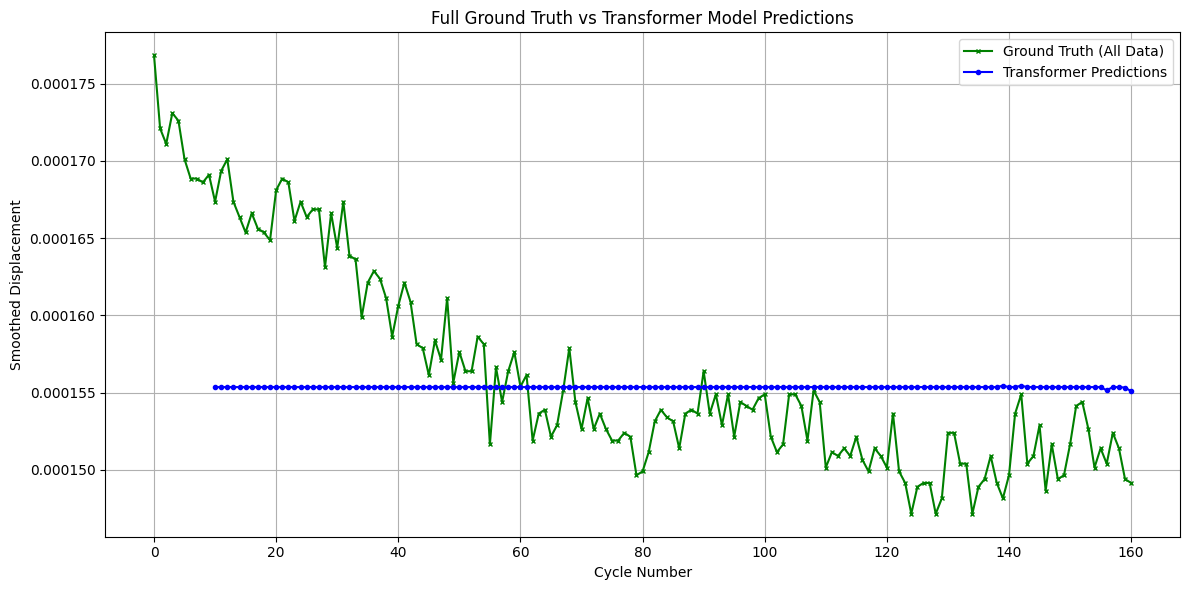

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Define sequence length as used in training
sequence_length = 10  # Adjust this to match the sequence length used in training

# Full ground truth data
all_ground_truth = final_df_160_0['smoothed_displacement'].values

# Create sequences for prediction
def create_full_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences).reshape(-1, sequence_length, 1)

# Generate sequences from full ground truth data
all_sequences = create_full_sequences(all_ground_truth, sequence_length)

# Make predictions for all sequences
predicted_displacement = transformer_model.predict(all_sequences)

# Plot the full ground truth data and Transformer predictions
plt.figure(figsize=(12, 6))

# Plot the entire ground truth data
plt.plot(range(len(all_ground_truth)), all_ground_truth, label='Ground Truth (All Data)', color='green', marker='x', markersize=3)

# Plot predictions from the Transformer model, aligning them with the appropriate cycle numbers
# Offset the predictions by `sequence_length` to align with the actual cycles
plt.plot(range(sequence_length, sequence_length + len(predicted_displacement)), predicted_displacement, label='Transformer Predictions', color='blue', marker='o', markersize=3)

# Add labels and title
plt.xlabel('Cycle Number')
plt.ylabel('Smoothed Displacement')
plt.title('Full Ground Truth vs Transformer Model Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# GRU

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GRU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
sequence_length = 10  # Adjust this based on what you used in Transformer
batch_size = 32

# Define GRU-based model
model_gru = tf.keras.Sequential([
    tf.keras.layers.GRU(64, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    tf.keras.layers.GRU(32, activation='relu', return_sequences=False),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the GRU model
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Prepare the data (use the same sequence length as used in training)
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length + 1])  # Include next step as target
    return np.array(sequences)

# Assuming `final_df_160_0` contains the full ground truth data
data = final_df_160_0['smoothed_displacement'].values
sequences = create_sequences(data, sequence_length)

X = sequences[:, :-1]  # Input sequence
y = sequences[:, -1]   # Target (next smoothed_displacement)

# Reshape X to have shape (samples, sequence_length, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train the GRU model
model_gru.fit(X, y, epochs=100, batch_size=batch_size, validation_split=0.2)

Epoch 1/100


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - loss: 3.2800e-06 - val_loss: 2.1855e-06
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.4303e-06 - val_loss: 9.2640e-07
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6550e-07 - val_loss: 7.6932e-07
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.8679e-07 - val_loss: 6.8356e-07
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.9681e-07 - val_loss: 5.1253e-07
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1493e-07 - val_loss: 3.6329e-07
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.3067e-07 - val_loss: 2.2266e-07
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.5810e-07 - val_loss: 1.4811e-07
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0539e-07 - val_loss: 8.9890e-08
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9452e-08 - val_loss: 6.6426e-08
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.6691e-08 - val_loss: 4.2560e-

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 561ms/step


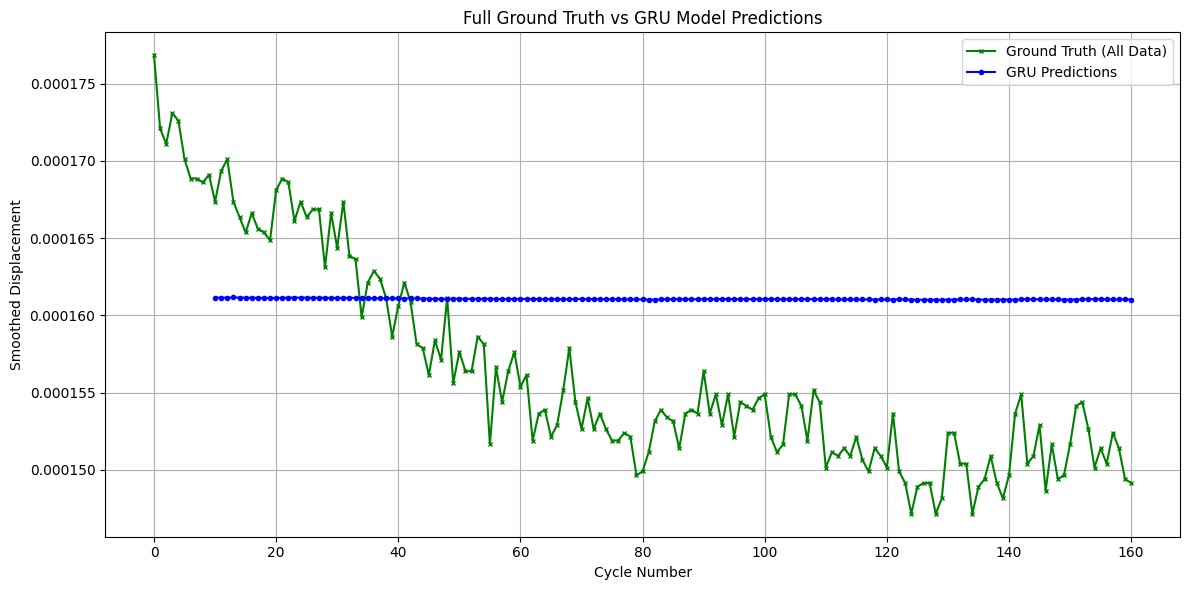

In [40]:

# Generate predictions for the full dataset
all_sequences = create_sequences(data, sequence_length)
X_full = all_sequences[:, :-1].reshape(-1, sequence_length, 1)
predicted_displacement = model_gru.predict(X_full)

# Plot Ground Truth vs GRU Predictions
plt.figure(figsize=(12, 6))

# Plot the entire ground truth data
plt.plot(range(len(data)), data, label='Ground Truth (All Data)', color='green', marker='x', markersize=3)

# Plot predictions from the GRU model, aligning them with the appropriate cycle numbers
plt.plot(range(sequence_length, sequence_length + len(predicted_displacement)), predicted_displacement, 
         label='GRU Predictions', color='blue', marker='o', markersize=3)

# Add labels and title
plt.xlabel('Cycle Number')
plt.ylabel('Smoothed Displacement')
plt.title('Full Ground Truth vs GRU Model Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()